In [91]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential # model
from tensorflow.keras.layers import Activation, Dense# Type of layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from functions import *
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

In [92]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("NUM GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

NUM GPUs Available:  1


In [93]:
df = pd.read_csv("assignment-files/wine.csv", index_col="index")
columns = df.columns
print(df.head())
df = df.drop_duplicates()
df = df[df["quality"] != 9]
print(df["quality"].value_counts())

       fixed acidity  volatile acidity  citric acid  chlorides  \
index                                                            
0                7.4              0.70         0.00      0.076   
1                7.8              0.88         0.00      0.098   
2                7.8              0.76         0.04      0.092   
3               11.2              0.28         0.56      0.075   
4                7.4              0.70         0.00      0.076   

       total sulfur dioxide  density    pH  sulphates  alcohol  quality  \
index                                                                     
0                      34.0   0.9978  3.51       0.56      9.4        5   
1                      67.0   0.9968  3.20       0.68      9.8        5   
2                      54.0   0.9970  3.26       0.65      9.8        5   
3                      60.0   0.9980  3.16       0.58      9.8        6   
4                      34.0   0.9978  3.51       0.56      9.4        5   

       colo

In [94]:
y = df["quality"].values
X = df.drop(["quality","target"], axis=1).values
X_train, X_test, y_train, y_test_unnorm = train_test_split(X,y,test_size=0.2, stratify=df["target"].values,
                                                           shuffle=True, random_state=6)

In [95]:
smote = SMOTE(random_state=6, k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [96]:
scaler = MinMaxScaler().fit(X_train)
X_train_smote = scaler.transform(X_train_smote)
X_test = scaler.transform(X_test)
scaler_y = MinMaxScaler().fit(y_train.reshape(-1,1))
y_train_smote = scaler_y.transform(y_train_smote.reshape(-1,1))
y_test = scaler_y.transform(y_test_unnorm.reshape(-1,1))

In [97]:
linear_model = Sequential([*
    [Dense(units=200,activation="tanh")]*100 + [Dense(units=1)]
                           ])
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.006),
    loss='mean_absolute_error')

history = linear_model.fit(X_train_smote, y_train_smote, epochs=300,
                           verbose=2,validation_split =0.2,batch_size=10)

Epoch 1/300
891/891 - 2s - loss: 0.2064 - val_loss: 0.4824
Epoch 2/300
891/891 - 2s - loss: 0.1989 - val_loss: 0.3734
Epoch 3/300
891/891 - 2s - loss: 0.1990 - val_loss: 0.2921
Epoch 4/300
891/891 - 2s - loss: 0.1960 - val_loss: 0.3682
Epoch 5/300
891/891 - 2s - loss: 0.1963 - val_loss: 0.3233
Epoch 6/300
891/891 - 2s - loss: 0.1946 - val_loss: 0.4152
Epoch 7/300
891/891 - 2s - loss: 0.1938 - val_loss: 0.3073
Epoch 8/300
891/891 - 2s - loss: 0.1936 - val_loss: 0.4629
Epoch 9/300
891/891 - 2s - loss: 0.1904 - val_loss: 0.3212
Epoch 10/300
891/891 - 2s - loss: 0.1906 - val_loss: 0.3562
Epoch 11/300
891/891 - 2s - loss: 0.1901 - val_loss: 0.4119
Epoch 12/300
891/891 - 2s - loss: 0.1879 - val_loss: 0.3493
Epoch 13/300
891/891 - 2s - loss: 0.1851 - val_loss: 0.4478
Epoch 14/300
891/891 - 2s - loss: 0.1844 - val_loss: 0.2956
Epoch 15/300
891/891 - 2s - loss: 0.1834 - val_loss: 0.4199
Epoch 16/300
891/891 - 2s - loss: 0.1822 - val_loss: 0.3728
Epoch 17/300
891/891 - 2s - loss: 0.1808 - val_lo

In [98]:
linear_model.save("models/linear_8.h5")

34/34 - 0s - loss: 0.1724
Status at last epoch:
train_score = 0.16699519753456116
val_score   = 0.3723052144050598


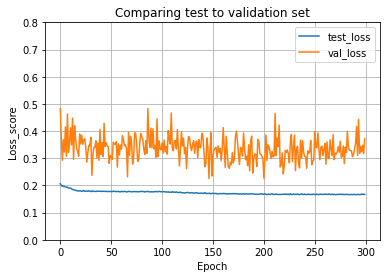

test loss_score: 0.17240010201931


In [99]:
test_results = linear_model.evaluate(X_test, y_test, verbose=2)
plot_and_print_loss(history)
print(f"test loss_score: {test_results}")

In [100]:
y_pred = linear_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

<Figure size 1008x1008 with 0 Axes>

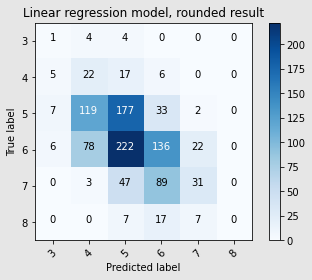

In [101]:
y_pred_classes = [round(x[0]) for x in y_pred]
labels = [3,4,5,6,7,8]
cm = confusion_matrix(y_test_unnorm, y_pred_classes)
plot_confusion_matrix(cm=cm, classes=labels,
                      title= "Linear regression model, rounded result")

In [102]:
print(classification_report(y_test_unnorm, y_pred_classes))

              precision    recall  f1-score   support

           3       0.05      0.11      0.07         9
           4       0.10      0.44      0.16        50
           5       0.37      0.52      0.44       338
           6       0.48      0.29      0.37       464
           7       0.50      0.18      0.27       170
           8       0.00      0.00      0.00        31

    accuracy                           0.35      1062
   macro avg       0.25      0.26      0.22      1062
weighted avg       0.42      0.35      0.35      1062



C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
